In [1]:
# The series can include trend

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import Holt
from pymannkendall import original_test
from sklearn.metrics import mean_squared_error

In [3]:
data = yf.download("XU100.IS", period = "2Y", interval = "1wk")[["Close"]]
data.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2022-01-31,1943.800049
2022-02-07,2051.100098
2022-02-14,2032.400024
2022-02-21,1952.400024
2022-02-28,1990.800049


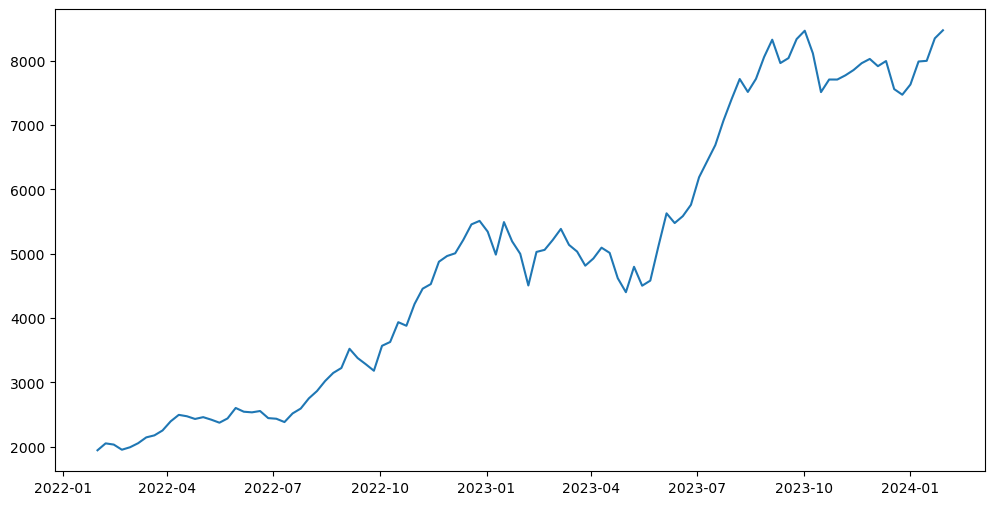

In [4]:
plt.figure(figsize = (12,6))
plt.plot(data)
plt.show(); # it seems there is trend

In [5]:
# trend test
print(original_test(data))

Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=12.501538366875556, Tau=0.827106227106227, s=4516.0, var_s=130433.33333333333, slope=66.08221260246101, intercept=1548.6248470157775)


In [6]:
# Also according to test, there is trend, so we can use DES
des = Holt(data["Close"])
model = des.fit(smoothing_level = 0.9, smoothing_trend = 0.6, optimized = False)
forecast = model.forecast(20)
print(forecast)

2024-02-05     8668.999087
2024-02-12     8857.156849
2024-02-19     9045.314611
2024-02-26     9233.472373
2024-03-04     9421.630135
2024-03-11     9609.787897
2024-03-18     9797.945660
2024-03-25     9986.103422
2024-04-01    10174.261184
2024-04-08    10362.418946
2024-04-15    10550.576708
2024-04-22    10738.734470
2024-04-29    10926.892232
2024-05-06    11115.049994
2024-05-13    11303.207756
2024-05-20    11491.365518
2024-05-27    11679.523280
2024-06-03    11867.681043
2024-06-10    12055.838805
2024-06-17    12243.996567
Freq: W-MON, dtype: float64


C:\Users\htcso\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  self._init_dates(dates, freq)


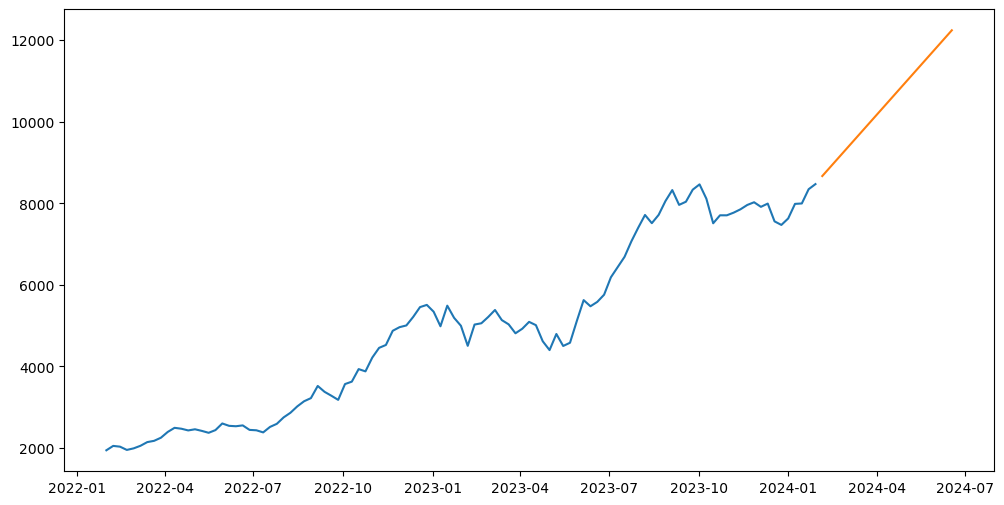

In [7]:
plt.figure(figsize = (12,6))
plt.plot(data)
plt.plot(forecast)
plt.show();

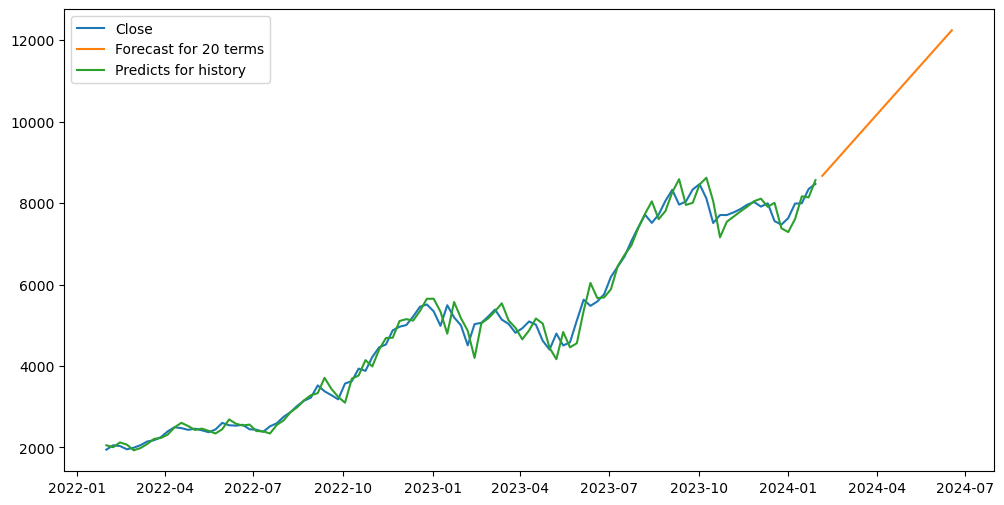

In [8]:
history = model.fittedvalues

plt.figure(figsize = (12,6))
plt.plot(data, label = "Close")
plt.plot(forecast, label = "Forecast for 20 terms")
plt.plot(history, label = "Predicts for history")
plt.legend()
plt.show();

In [9]:
def error(y, predict):
    print("MSE: {}".format(mean_squared_error(y, predict)))
    print("RMSE: {}".format(np.sqrt(mean_squared_error(y, predict))))

In [10]:
error(data["Close"], history)

MSE: 64751.40372551242
RMSE: 254.4629712266844


In [11]:
model2 = des.fit(optimized = True, use_brute = True)
history2 = model2.fittedvalues
forecast2 = model2.forecast(20)

In [12]:
error(data["Close"], history)
print("---------------------")
error(data["Close"], history2)

MSE: 64751.40372551242
RMSE: 254.4629712266844
---------------------
MSE: 50892.00158771233
RMSE: 225.59255658756192


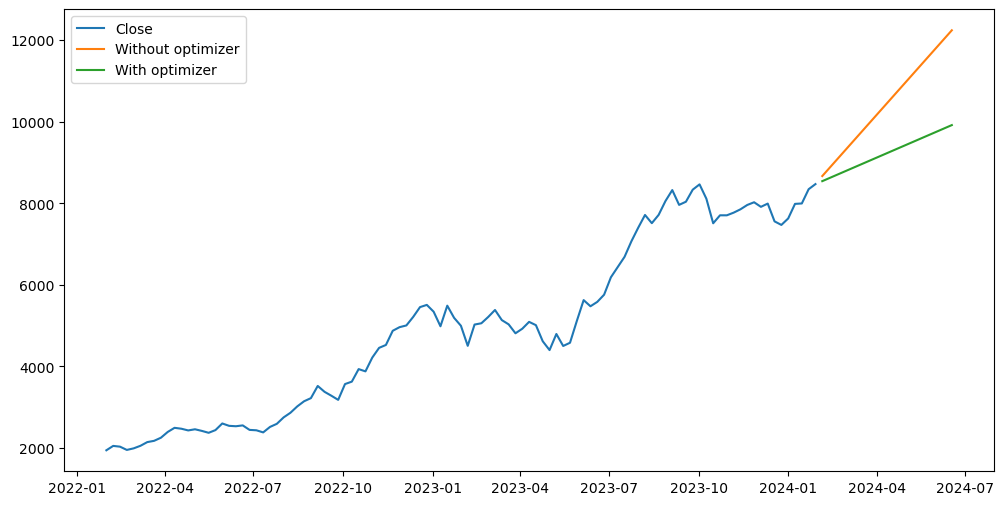

In [13]:
plt.figure(figsize = (12,6))
plt.plot(data, label = "Close")
plt.plot(forecast, label = "Without optimizer")
plt.plot(forecast2, label = "With optimizer")
plt.legend()
plt.show();